<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [6]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [12]:
import yfinance as yf
import pandas as pd

tsla = yf.Ticker("TSLA")

history = tsla.history(period="max")

tesla_data = pd.DataFrame(data=history, columns=["Date", "Open", "High", "Low", "Close", "adj_close","Volume"])

print(tesla_data)






            Date        Open        High         Low       Close  adj_close  \
Date                                                                          
2010-06-29   NaN    1.266667    1.666667    1.169333    1.592667        NaN   
2010-06-30   NaN    1.719333    2.028000    1.553333    1.588667        NaN   
2010-07-01   NaN    1.666667    1.728000    1.351333    1.464000        NaN   
2010-07-02   NaN    1.533333    1.540000    1.247333    1.280000        NaN   
2010-07-06   NaN    1.333333    1.333333    1.055333    1.074000        NaN   
...          ...         ...         ...         ...         ...        ...   
2023-06-14   NaN  260.170013  261.570007  250.500000  256.790009        NaN   
2023-06-15   NaN  248.399994  258.950012  247.289993  255.899994        NaN   
2023-06-16   NaN  258.920013  263.600006  257.209991  260.540009        NaN   
2023-06-20   NaN  261.500000  274.750000  261.119995  274.450012        NaN   
2023-06-21   NaN  275.130005  276.980011  257.779999

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [25]:
import yfinance as yf
import pandas as pd

tsla = yf.Ticker("TSLA")

history = tsla.history(period="max")

tesla_data = pd.DataFrame(data=history, columns=["Date", "Open", "High", "Low", "Close", "adj_close","Volume"])

print(tesla_data)

tesla_data.reset_index(inplace=True, drop=True)

            Date        Open        High         Low       Close  adj_close  \
Date                                                                          
2010-06-29   NaN    1.266667    1.666667    1.169333    1.592667        NaN   
2010-06-30   NaN    1.719333    2.028000    1.553333    1.588667        NaN   
2010-07-01   NaN    1.666667    1.728000    1.351333    1.464000        NaN   
2010-07-02   NaN    1.533333    1.540000    1.247333    1.280000        NaN   
2010-07-06   NaN    1.333333    1.333333    1.055333    1.074000        NaN   
...          ...         ...         ...         ...         ...        ...   
2023-06-14   NaN  260.170013  261.570007  250.500000  256.790009        NaN   
2023-06-15   NaN  248.399994  258.950012  247.289993  255.899994        NaN   
2023-06-16   NaN  258.920013  263.600006  257.209991  260.540009        NaN   
2023-06-20   NaN  261.500000  274.750000  261.119995  274.450012        NaN   
2023-06-21   NaN  275.130005  276.980011  257.779999

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [26]:
import yfinance as yf
import pandas as pd

tsla = yf.Ticker("TSLA")

history = tsla.history(period="max")

tesla_data = pd.DataFrame(data=history, columns=["Date", "Open", "High", "Low", "Close", "adj_close","Volume"])

tesla_data.reset_index(inplace=True, drop=True)

print(tesla_data.head())



   Date      Open      High       Low     Close  adj_close     Volume
0   NaN  1.266667  1.666667  1.169333  1.592667        NaN  281494500
1   NaN  1.719333  2.028000  1.553333  1.588667        NaN  257806500
2   NaN  1.666667  1.728000  1.351333  1.464000        NaN  123282000
3   NaN  1.533333  1.540000  1.247333  1.280000        NaN   77097000
4   NaN  1.333333  1.333333  1.055333  1.074000        NaN  103003500


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [ ]:
import requests 

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.html"

html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [34]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [37]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1]:
    try:
        col = row.find_all("td")
    except AttributeError: 
        pass
    else:
        data = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Data": data, "Revenue": revenue},ignore_index = True)

tesla_revenue

,Date,Revenue,Data
0,NaN,"$21,454",2022-09-30
1,NaN,"$16,934",2022-06-30
2,NaN,"$18,756",2022-03-31
3,NaN,"$17,719",2021-12-31
4,NaN,"$13,757",2021-09-30
5,NaN,"$11,958",2021-06-30
6,NaN,"$10,389",2021-03-31
7,NaN,"$10,744",2020-12-31
8,NaN,"$8,771",2020-09-30
9,NaN,"$6,036",2020-06-30


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [39]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(",", "")
print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue, Data]
Index: []


Execute the following lines to remove an null or empty strings in the Revenue column.


In [43]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

print(tesla_revenue)

Empty DataFrame
Columns: [Date, Revenue, Data]
Index: []


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [46]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1]:
    try:
        col = row.find_all("td")
    except AttributeError: 
        pass
    else:
        data = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Data": data, "Revenue": revenue},ignore_index = True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(",", "")
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())

   Date Revenue        Data
48  NaN     $31  2010-09-30
49  NaN     $28  2010-06-30
50  NaN     $21  2010-03-31
52  NaN     $46  2009-09-30
53  NaN     $27  2009-06-30


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [8]:
import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")


gme_data = gme.history(period="max")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [9]:
import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

print(gme_data)

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620128   1.693350   1.603296   1.691667  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683251   1.687459   1.658002   1.674835   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662210   1.603296   1.662210   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-03-20  16.650000  17.270000  16.250000  16.870001   4463700        0.0   
2023-03-21  17.150000  18.350000  17.139999  17.650000  15882900        0.0   
2023-03-22  26.600000  27.000000  23.049999  23.870001  66764700        0.0   
2023-03-23  22.570000  24.590000  22.129999  22.580000  11168900        0.0   
2023-03-24  22.320000  23.990000  22.100000  23.9800

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [47]:
import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [ ]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data= requests.get(url).text




Parse the html data using `beautiful_soup`.


In [48]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data= requests.get(url).text

soup = BeautifulSoup(html_data)

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [43]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data= requests.get(url).text

soup = BeautifulSoup(html_data)

gme_revenue = pd.DataFrame(columns =["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    
print(gme_revenue.tail())
                               

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [49]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data= requests.get(url).text

soup = BeautifulSoup(html_data)

gme_revenue = pd.DataFrame(columns =["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
    
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



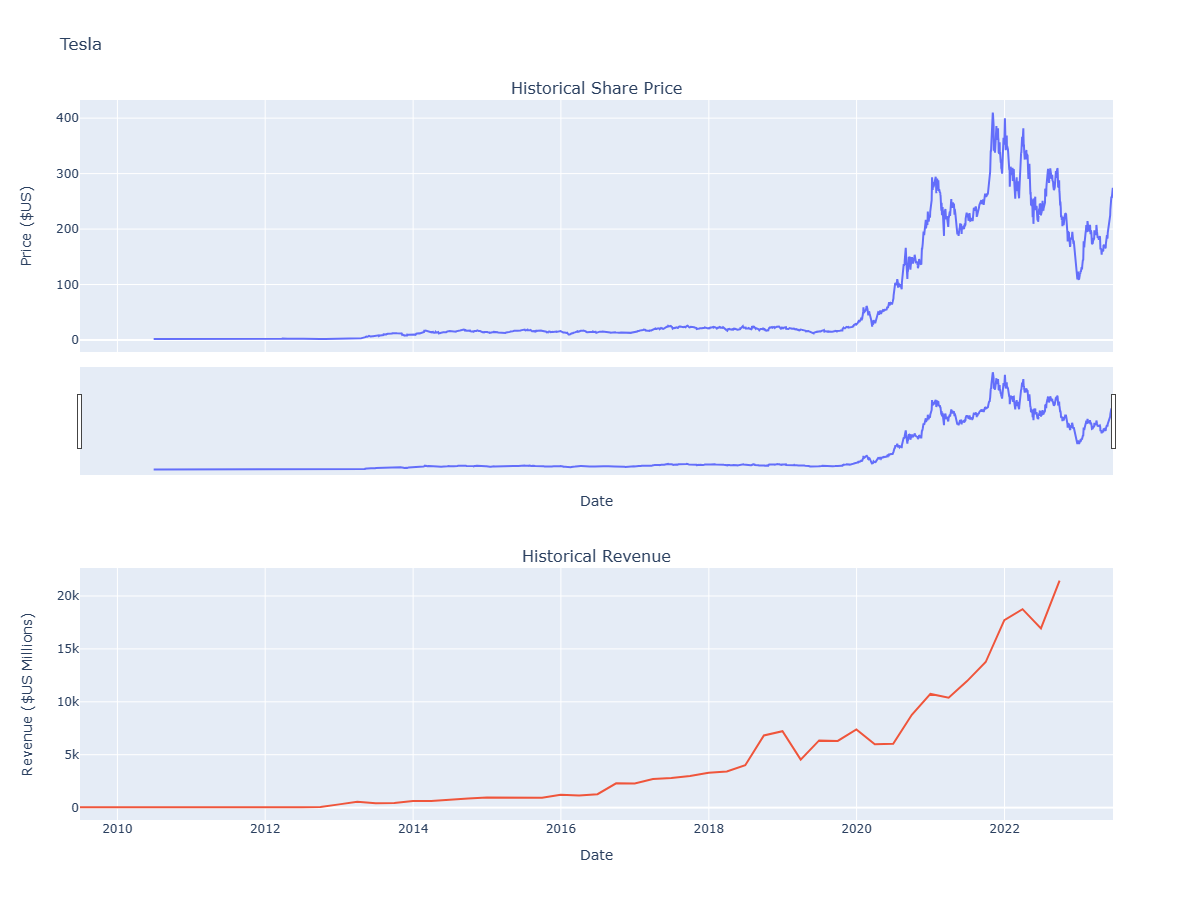

In [74]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import yfinance as yf

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")
tesla_data.reset_index(inplace = True)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1]:
    try:
        col = row.find_all("td")
    except AttributeError:
        pass
    else:
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue},ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(",", "")
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace("$", "")
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



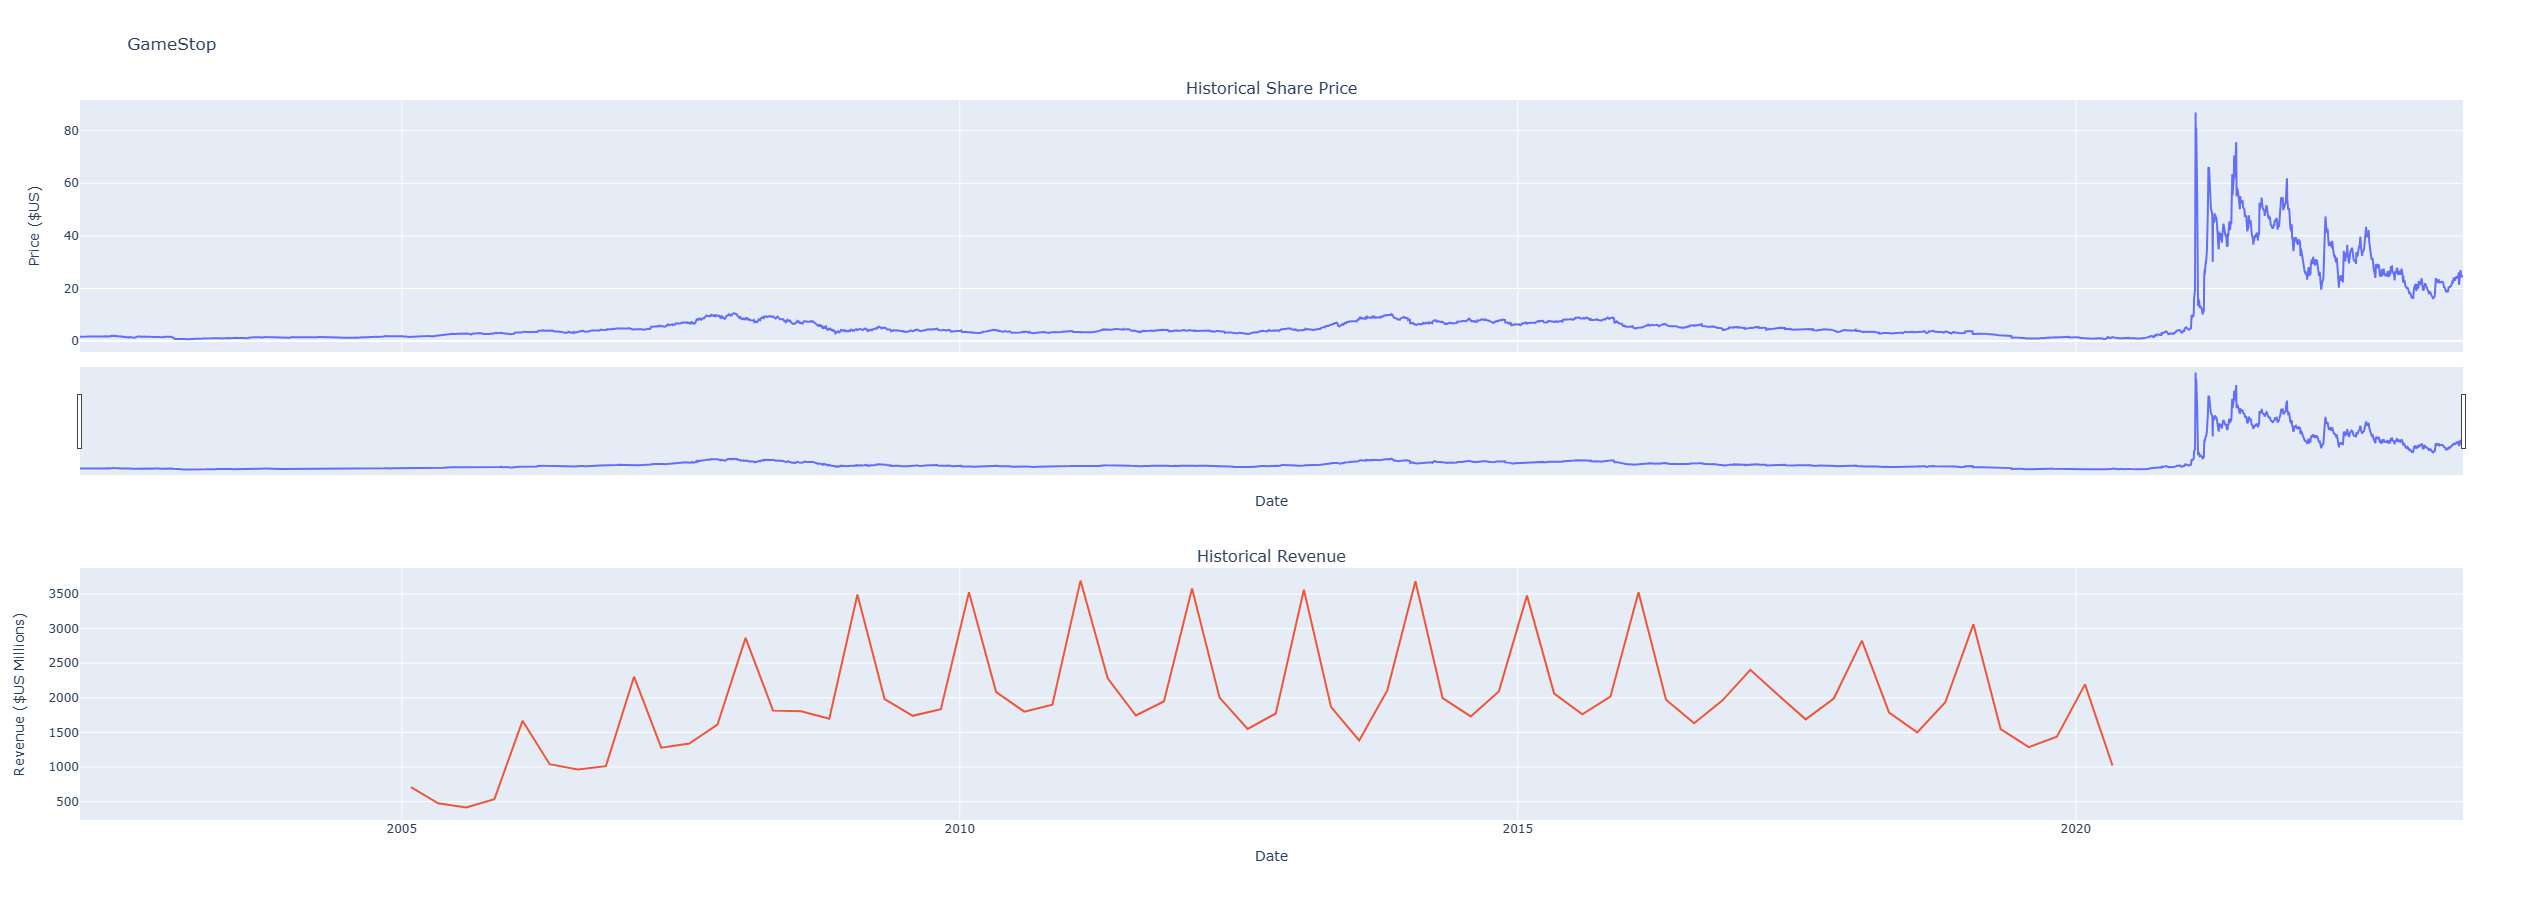

In [75]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

    
    
    
    
    
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period = 'max')
gme_data.reset_index(inplace = True)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data= requests.get(url).text

soup = BeautifulSoup(html_data)
gme_revenue = pd.DataFrame(columns =["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(",", "")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace("$", "")
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
